In [ ]:
import pandas as pd
# importing libraries for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dataset_path = '/content/drive/MyDrive/dataset/german_credit_data.csv'
data = pd.read_csv(dataset_path)


In [ ]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


# `Data Preprocessing`

In [ ]:
# Handle missing values in numerical columns
numerical_cols = ['Credit amount', 'Duration']
imputer = SimpleImputer(strategy='median')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])


In [ ]:
# Handle missing values in categorical columns
categorical_cols = ['Saving accounts', 'Checking account']
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])


In [ ]:
# Encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(data[['Sex', 'Housing', 'Purpose']]))
data = pd.concat([data, encoded_features], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Scale numerical features
scaler = StandardScaler()
data['Credit amount'] = scaler.fit_transform(data['Credit amount'].values.reshape(-1, 1))
data['Duration'] = scaler.fit_transform(data['Duration'].values.reshape(-1, 1))


# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

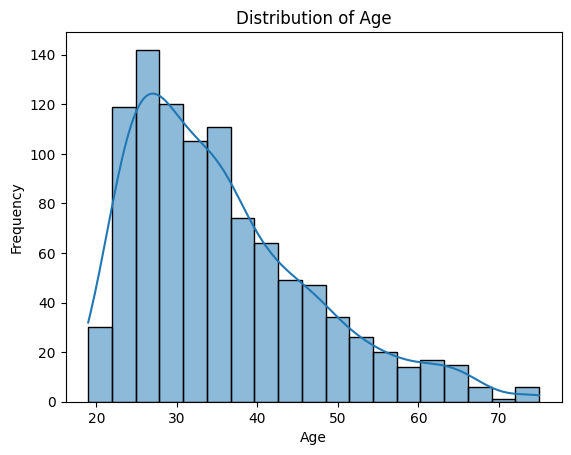

In [ ]:
# EDA for numerical variables
sns.histplot(data['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

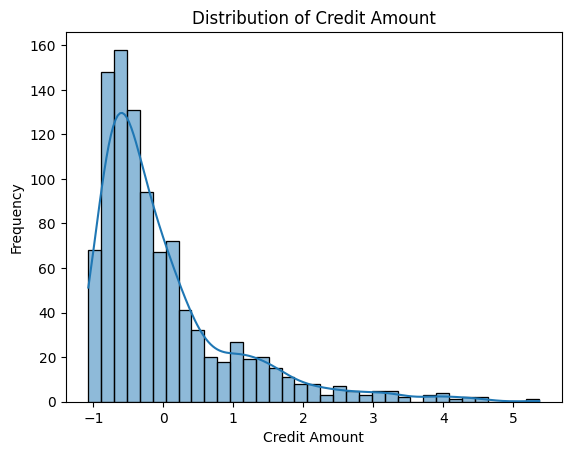

In [ ]:
sns.histplot(data['Credit amount'], kde=True)
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Amount')
plt.show()

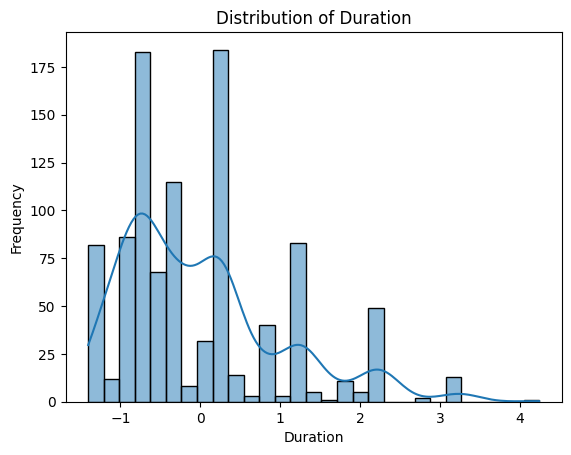

In [ ]:
sns.histplot(data['Duration'], kde=True)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')
plt.show()

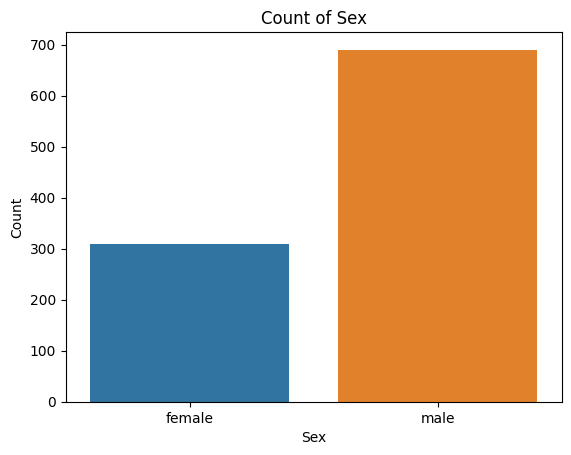

In [ ]:
# Convert 'Sex' to categorical data type
data['Sex'] = data['Sex'].astype('category')

# EDA for categorical variable 'Sex'
sns.countplot(data=data, x='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Sex')
plt.show()


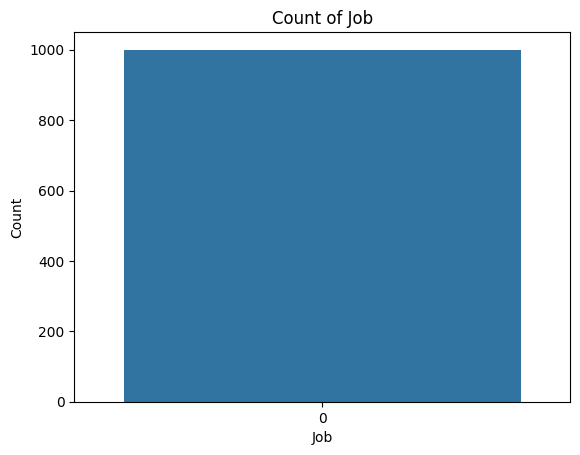

In [ ]:
sns.countplot(data['Job'])
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Count of Job')
plt.show()

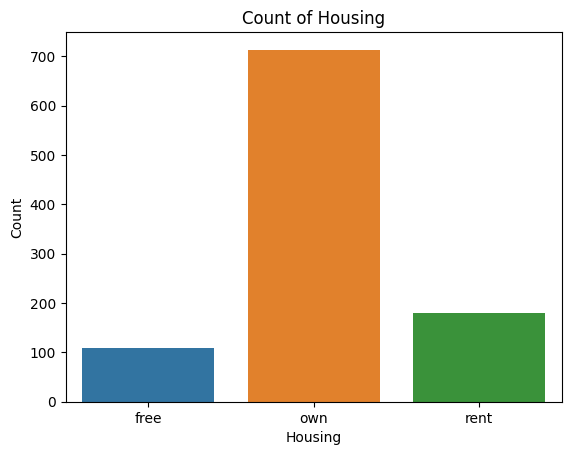

In [ ]:
# Convert 'Housing' to categorical data type
data['Housing'] = data['Housing'].astype('category')

# EDA for categorical variable 'Housing'
sns.countplot(data=data, x='Housing')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.title('Count of Housing')
plt.show()



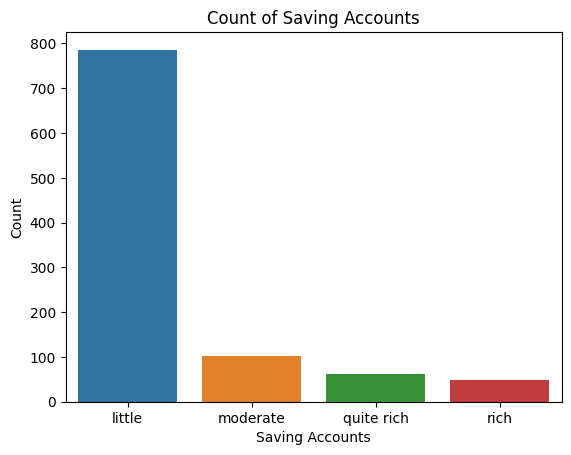

In [ ]:
# Convert 'Saving accounts' to categorical data type
data['Saving accounts'] = data['Saving accounts'].astype('category')

# EDA for categorical variable 'Saving accounts'
sns.countplot(data=data, x='Saving accounts')
plt.xlabel('Saving Accounts')
plt.ylabel('Count')
plt.title('Count of Saving Accounts')
plt.show()


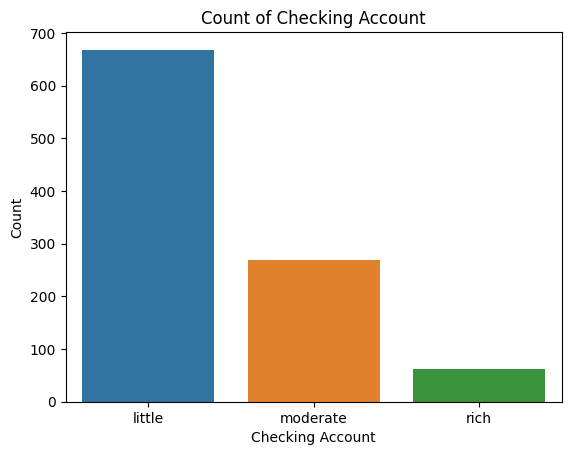

In [ ]:
# Convert 'Checking account' to categorical data type
data['Checking account'] = data['Checking account'].astype('category')

# EDA for categorical variable 'Checking account'
sns.countplot(data=data, x='Checking account')
plt.xlabel('Checking Account')
plt.ylabel('Count')
plt.title('Count of Checking Account')
plt.show()


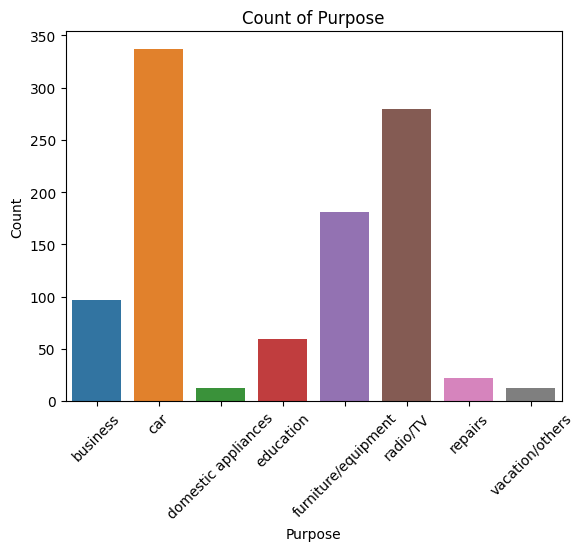

In [ ]:
# Convert 'Purpose' to categorical data type
data['Purpose'] = data['Purpose'].astype('category')

# EDA for categorical variable 'Purpose'
sns.countplot(data=data, x='Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Count of Purpose')
plt.xticks(rotation=45)
plt.show()


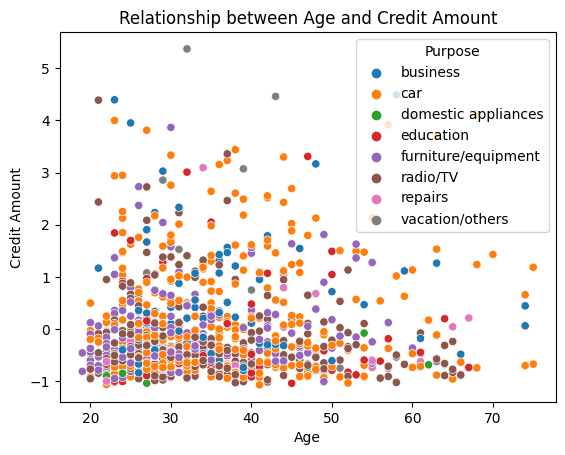

In [ ]:
# Convert 'Purpose' to categorical data type
data['Purpose'] = data['Purpose'].astype('category')

# EDA for relationships
sns.scatterplot(data=data, x='Age', y='Credit amount', hue='Purpose')
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.title('Relationship between Age and Credit Amount')
plt.show()


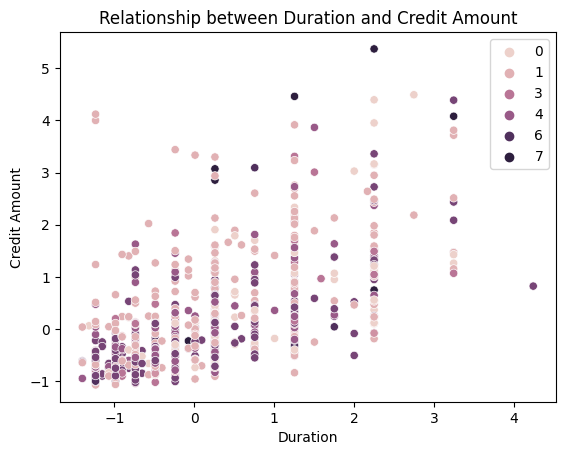

In [ ]:
# Encode 'Purpose' column with integer labels
purpose_labels = data['Purpose'].astype('category').cat.codes

# EDA for relationships
sns.scatterplot(data=data, x='Duration', y='Credit amount', hue=purpose_labels)
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.title('Relationship between Duration and Credit Amount')
plt.show()


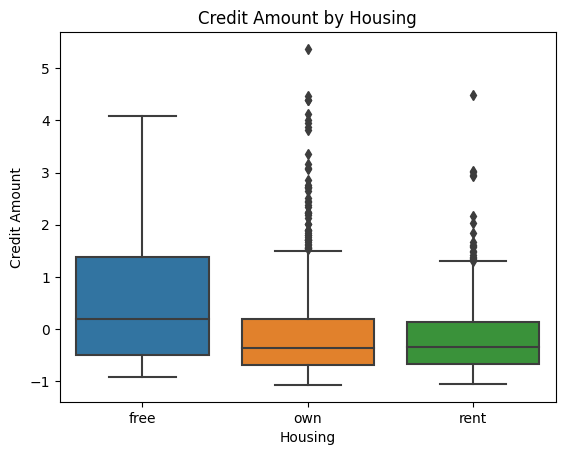

In [ ]:
sns.boxplot(data=data, x='Housing', y='Credit amount')
plt.xlabel('Housing')
plt.ylabel('Credit Amount')
plt.title('Credit Amount by Housing')
plt.show()

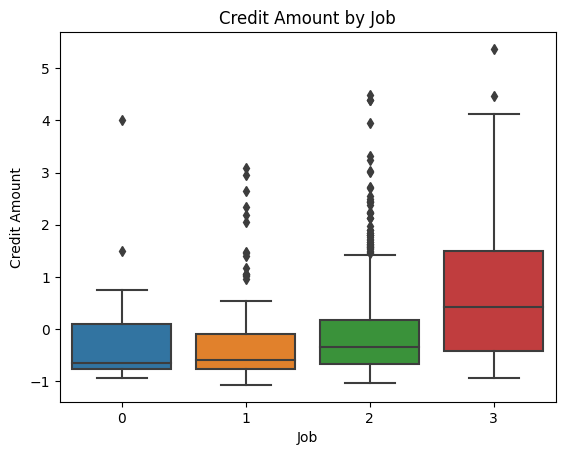

In [ ]:
sns.boxplot(data=data, x='Job', y='Credit amount')
plt.xlabel('Job')
plt.ylabel('Credit Amount')
plt.title('Credit Amount by Job')
plt.show()

In [ ]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,0,1,2,3,4,5,6,7,8,9
0,0,67,male,2,own,little,little,-0.745131,-1.236478,radio/TV,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,22,female,2,own,little,moderate,0.949817,2.248194,radio/TV,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,49,male,1,own,little,little,-0.416562,-0.738668,education,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,45,male,2,free,little,little,1.634247,1.750384,furniture/equipment,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,53,male,2,free,little,little,0.566664,0.256953,car,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
